In [2]:
!pip install fredapi 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/96/d4/f81fa9f67775a6a4b9e2cd8487239d61a9698cb2b9c02a5a2897d310f7a4/fredapi-0.5.1-py3-none-any.whl.metadata


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
# pd.set_option('max_columns', 500)

from fredapi import Fred

In [7]:
key='aaa23f1519fdaba39c7e673c5d444111'

In [8]:
fred = Fred(api_key=key)

In [10]:
sp_search=fred.search('S&P', order_by='popularity')

In [13]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-06,2023-11-06,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 09:07:01-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-06,2023-11-06,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-06,2023-11-06,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 09:07:08-05:00,82,This data represents the effective yield of th...
SP500,SP500,2023-11-06,2023-11-06,S&P 500,2013-11-04,2023-11-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-03 19:11:03-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-11-06,2023-11-06,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


In [14]:
## Pulling RAW data

sp500=fred.get_series(series_id='SP500')

In [15]:
sp500

2013-11-04    1767.93
2013-11-05    1762.97
2013-11-06    1770.49
2013-11-07    1747.15
2013-11-08    1770.61
               ...   
2023-10-30    4166.82
2023-10-31    4193.80
2023-11-01    4237.86
2023-11-02    4317.78
2023-11-03    4358.34
Length: 2610, dtype: float64

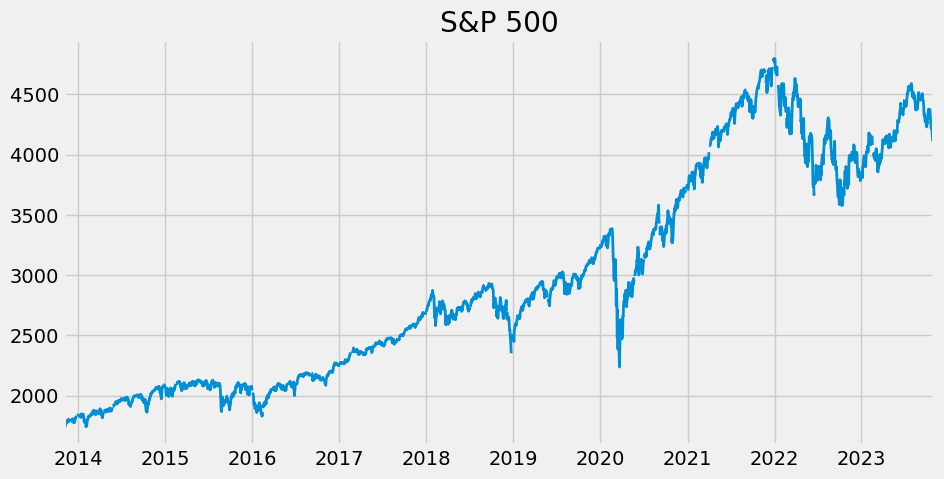

In [22]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)  ## lw means line width
plt.show()

In [23]:
## THE UNEMPLOYMENT DATASET

In [24]:
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-06,2023-11-06,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-11-06,2023-11-06,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-03 07:50:14-05:00,56,The unemployment rate represents the number of...
NROU,NROU,2023-11-06,2023-11-06,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,68,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-11-06,2023-11-06,Unemployment Level,1948-01-01,2023-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-11-03 07:50:05-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-11-06,2023-11-06,Continued Claims (Insured Unemployment),1967-01-07,2023-10-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-11-02 07:33:04-05:00,73,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN291830000000003A,LAUCN291830000000003A,2023-11-06,2023-11-06,"Unemployment Rate in St. Charles County, MO",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:39:19-05:00,0,These data come from the Current Population Su...
LAUCN200910000000003A,LAUCN200910000000003A,2023-11-06,2023-11-06,"Unemployment Rate in Johnson County, KS",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:40:09-05:00,0,These data come from the Current Population Su...
LAUCN060430000000003A,LAUCN060430000000003A,2023-11-06,2023-11-06,"Unemployment Rate in Mariposa County, CA",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:41:17-05:00,0,These data come from the Current Population Su...


In [25]:
unemployment = fred.get_series(series_id='UNRATE')
unemployment

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
Length: 910, dtype: float64

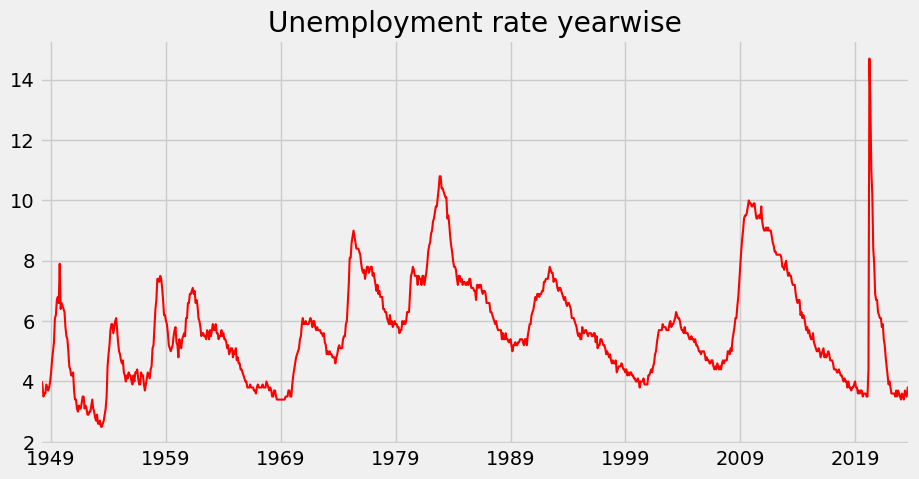

In [32]:
unemployment.plot(figsize=(10,5), color='r', lw=1.5, title='Unemployment rate yearwise')
plt.show()

In [33]:
fred.search('India')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
INDCPIALLMINMEI,INDCPIALLMINMEI,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for India,1960-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-10-12 11:41:02-05:00,49,OECD Descriptor ID: CPALTT01 OECD unit ID: IDX...
CPALTT01INM659N,CPALTT01INM659N,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for India,1960-01-01,2023-08-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-10-12 11:41:03-05:00,37,OECD Descriptor ID: CPALTT01 OECD unit ID: PC ...
INDCPIALLQINMEI,INDCPIALLQINMEI,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for India,1960-01-01,2023-04-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-08-10 15:33:03-05:00,16,OECD Descriptor ID: CPALTT01 OECD unit ID: IDX...
CPALTT01INQ659N,CPALTT01INQ659N,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for India,1960-01-01,2023-04-01,Quarterly,Q,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-08-10 15:33:05-05:00,10,OECD Descriptor ID: CPALTT01 OECD unit ID: PC ...
INDCPALTT01IXNBM,INDCPALTT01IXNBM,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for India,1960-01-01,2023-08-01,Monthly,M,Index source base,Index source base,Not Seasonally Adjusted,NSA,2023-10-12 11:41:07-05:00,7,OECD Descriptor ID: CPALTT01 OECD unit ID: IDX...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BSPRFT02INQ460N,BSPRFT02INQ460N,2023-11-06,2023-11-06,Business Tendency Surveys for Manufacturing: P...,2000-01-01,2013-07-01,Quarterly,Q,Net Percent,Net %,Not Seasonally Adjusted,NSA,2013-11-05 11:25:36-06:00,0,OECD descriptor ID: BSPRFT02 OECD unit ID: ST ...
DMMISTRIAOAIIN,DMMISTRIAOAIIN,2023-11-06,2023-11-06,Amount Outstanding of Domestic Money Market in...,1998-10-01,2015-01-01,Quarterly,Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2015-09-14 13:51:37-05:00,0,This series appears in Table 17a. Source Code:...
IDSBMRINIIN,IDSBMRINIIN,2023-11-06,2023-11-06,Net Issues of International Debt Securities fo...,1987-01-01,2015-04-01,Quarterly,Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2015-09-14 13:46:37-05:00,0,This series appears in Table 11b. Nationality...


In [35]:
india_set=fred.get_series('IDSGNFAMNIAOIN')

In [36]:
india_set

1993-07-01     2.2368
1993-10-01     2.3106
1994-01-01     2.3119
1994-04-01     2.6678
1994-07-01     2.9687
               ...   
2014-04-01    26.7773
2014-07-01    30.6007
2014-10-01    30.3941
2015-01-01    30.8869
2015-04-01    32.9516
Length: 88, dtype: float64

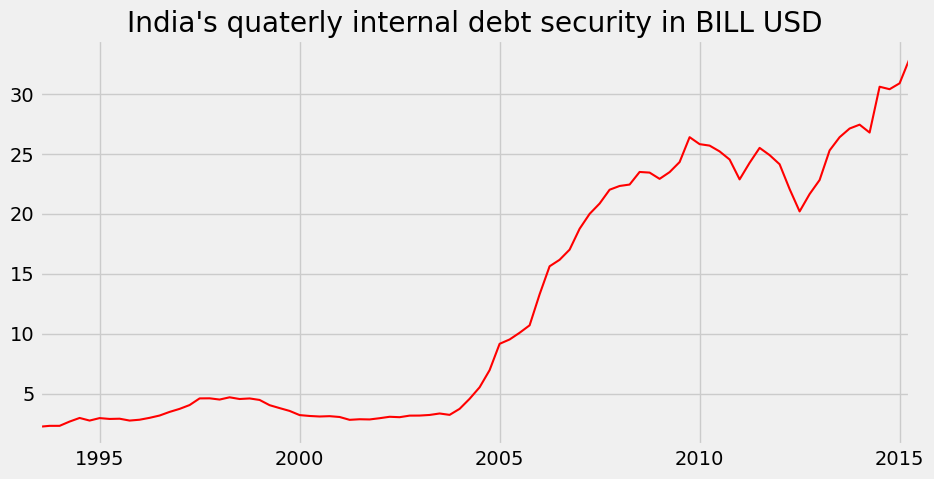

In [43]:
india_set.plot(figsize=(10,5), color='r', lw=1.5, title="India's quaterly internal debt security in BILL USD")
plt.show()